# 딥러닝1 : 회귀

## 1.환경준비

### (1) 라이브러리 로딩

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Input
from keras.backend import clear_session
from keras.optimizers import Adam

* 학습곡선 그래프

### (2) 데이터로딩

In [ ]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv'
data = pd.read_csv(path)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


|	변수	|	설명	|
|----|----|
|	medv	|	타운별 집값(중위수)	|
|	crim	|	범죄율	|
|	zn	|	25,000 평방피트를 초과 거주지역 비율	|
|	indus	|	비소매상업지역 면적 비율	|
|	chas	|	찰스강변 위치(범주 : 강변1, 아니면 0)	|
|	nox	|	일산화질소 농도	|
|	rm	|	주택당 방 수	|
|	age	|	1940년 이전에 건축된 주택의 비율	|
|	dis	|	직업센터의 거리	|
|	rad	|	방사형 고속도로까지의 거리	|
|	tax	|	재산세율	|
|	ptratio	|	학생/교사 비율	|
|	lstat	|	인구 중 하위 계층 비율	|


## 2.데이터 준비

lstat, ptratio, crim 만 이용하여 medv를 예측하는 모델을 만들어 봅시다.

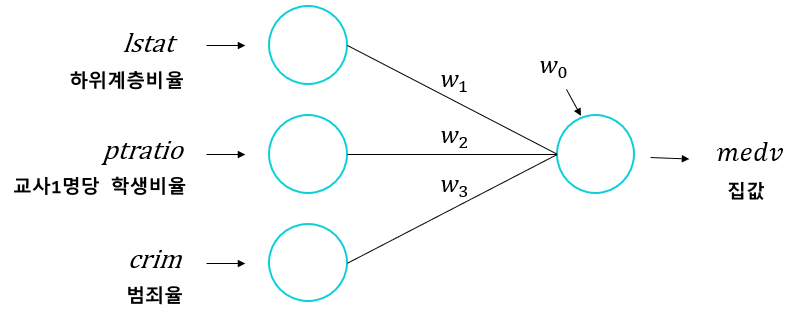

### (1) 데이터 준비
* x, y 나누기
    * x : lstat, ptratio, crim
    * y : medv

In [ ]:
target = 'medv'
features = ['lstat', 'ptratio', 'crim']
x = data.loc[:, features]                  # loc[행,열]: 모든 행, feature 열의 값들만 x에
y = data.loc[:, target]

### (2) NaN 조치

### (3) 가변수화

#### 결측치 없고 범주형 데이터 없어서 가변수화 x

### (4) 데이터분할

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

### (5) Scaling

In [ ]:
# 스케일러 선언
scaler = MinMaxScaler()                     # x_norm = (x-x_min)/(x_max-x_min)

# train 셋으로 fitting & 적용
x_train = scaler.fit_transform(x_train)     # fit: 최댓값, 최솟값 계산 / transform: 식을 계산

# validation 셋은 적용만!
x_val = scaler.transform(x_val)             # fit을 안하는건 최댓값, 최솟값이 바뀌니까 처음에 지정한걸로

## 3.딥러닝1 : 3개의 feature

### (1) 모델설계

In [ ]:
# 분석단위의 shape
nfeatures = x_train.shape[1] #num of columns
nfeatures

12

In [ ]:

# 메모리 정리
clear_session()

# Sequential 타입
model = Sequential([Input(shape = (nfeatures,)),
                    Dense(1) ])
# 모델요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

* compile
    * optimizer = 'adam'    : 기본값으로 옵티마이저 사용(learning_rate = 0.001)
    * optimizer = Adam(lr = 0.1) : 옵션 값 조정 가능
        * lr과 learning_rate은 같지만, learning_rate 사용을 권장

In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.1), loss = 'mse')

### (2) 학습

validation_split=0.2 : 학습시, 학습용 데이터에서 0.2 만큼 떼어 내서 검증셋으로 활용

In [ ]:
history = model.fit(x_train, y_train,
                    epochs = 20, validation_split=0.2).history

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 523.3051 - val_loss: 440.8445
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 328.0430 - val_loss: 305.5989
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 234.2145 - val_loss: 233.6855
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 204.5192 - val_loss: 199.2636
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 149.4977 - val_loss: 180.5013
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 159.8966 - val_loss: 164.8554
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 129.2095 - val_loss: 150.6098
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 125.8438 - val_loss: 136.5542
Epoch 9/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 110.8806 - val_loss: 124.3258
Epoch 10/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 115.3973 - val_loss: 113.8613
Epoch 11/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 88.7831 - val_loss: 105.0130
Epoch 12/20
11/11 ━━━━━━━━━━━

* 학습결과 그래프

In [ ]:
# 함수로 만들어서 사용합시다.
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

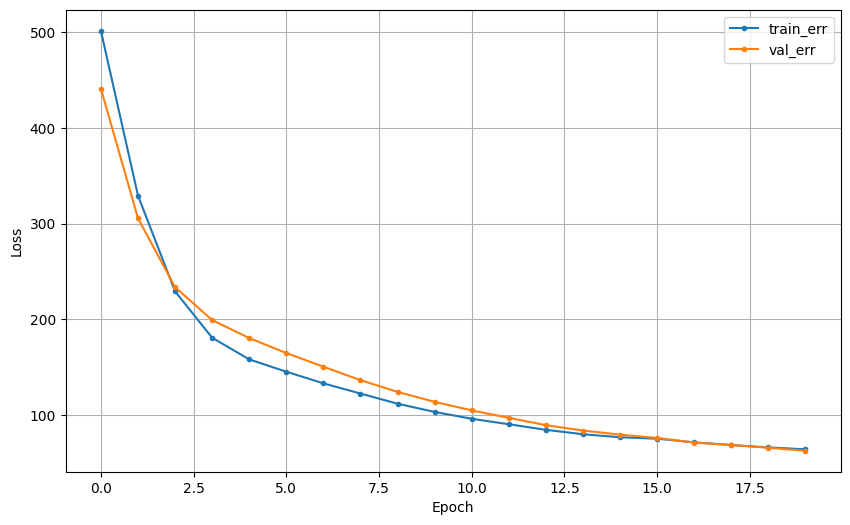

In [ ]:
dl_history_plot(history)

### (3) 예측 및 검증

In [ ]:
pred = model.predict(x_val)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [ ]:
print(f'RMSE : {root_mean_squared_error(y_val, pred)}')
print(f'MAE  : {mean_absolute_error(y_val, pred)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred)}')

RMSE : 6.866956655716387
MAE  : 4.9107131901909336
MAPE : 0.2510636516544033


## 4.딥러닝2 : 전체 feature
* 이제 전체 데이터를 가지고 모델링을 시도해 보겠습니다.


### (1) 데이터 전처리

In [ ]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


* x,y 나누기 & 데이터 분할

In [ ]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:, target]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

* 스케일링

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [ ]:
nfeatures = x_train.shape[1]
nfeatures

12

In [ ]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model2 = Sequential([Input(shape = (nfeatures,)),
                    Dense(1) ])

# 모델요약
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

* compile

In [ ]:
model2.compile( optimizer= 'adam', loss = 'mse' )   # 위랑 다르게 optimizer='adam'이면 learning rate를 기본(0.1)로

* 학습

In [ ]:
history = model2.fit(x_train, y_train, epochs = 20, validation_split= 0.2 ).history

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 623.0679 - val_loss: 662.3611
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 560.7205 - val_loss: 659.8846
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 590.3834 - val_loss: 657.3865
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 619.3932 - val_loss: 654.9055
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 588.9648 - val_loss: 652.4630
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 629.0217 - val_loss: 650.0266
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 604.7563 - val_loss: 647.5984
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 562.5471 - val_loss: 645.1694
Epoch 9/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 634.4292 - val_loss: 642.7282
Epoch 10/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 608.9653 - val_loss: 640.3024
Epoch 11/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 572.5847 - val_loss: 637.9457
Epoch 12/20
11/11 ━━━━━━━━━━━

* 학습결과 그래프

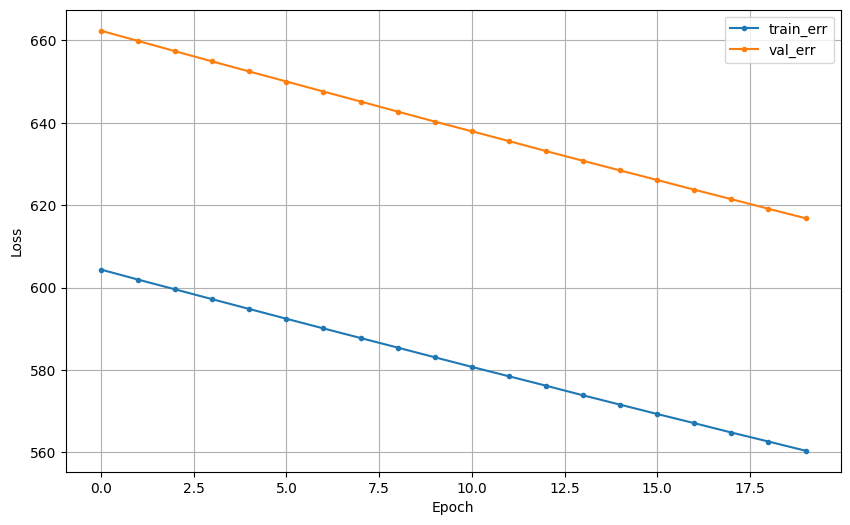

In [ ]:
dl_history_plot(history)

* 예측 및 평가

In [ ]:
pred2 = model2.predict(x_val)
print(f'RMSE : {root_mean_squared_error(y_val, pred2)}')
print(f'MAE  : {mean_absolute_error(y_val, pred2)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred2)}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
RMSE : 22.25293236269366
MAE  : 20.701670164337344
MAPE : 0.9483122810407497


* 회귀 모델 예측값 vs 실제값 그래프

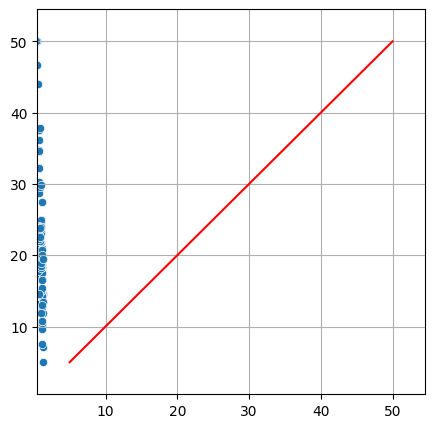

In [ ]:
def visualization_result(y_val,pred):
    plt.figure(figsize = (5,5))
    y = x = np.linspace(y_val.min(), y_val.max(), 10)

    y_range = y_val.max() - y_val.min()
    mi, ma = y_val.min() - y_range*0.1 , y_val.max()+ y_range*0.1

    sns.scatterplot(x= pred.reshape(-1), y = y_val.values)
    sns.lineplot(x = x, y = y, color = 'r')
    plt.xlim(mi, ma)
    plt.ylim(mi, ma)
    plt.grid()

    plt.show()

visualization_result(y_val,pred2)

## 5.복습문제(9/21 이거만)
* 위 4번에 이어서, 여러분은 다음을 조절할 수 있습니다.
    * epochs(반복횟수), learning_rate(학습율)
* 4번 코드를 그대로 보면서 작성하고 위 두가지를 조절하며 성능을 높여봅시다!

### (1) 데이터 전처리

* 데이터 분할

In [ ]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:, target]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

* 스케일링

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [ ]:
nfeatures = x_train.shape[1]
nfeatures

12

In [ ]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model_prac = Sequential([Input(shape = (nfeatures,)),
                    Dense(1) ])

# 모델요약
model_prac.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

* compile

In [ ]:
model_prac.compile(optimizer=Adam(learning_rate=0.1), loss='mse')

* 학습

In [ ]:
history = model_prac.fit(x_train, y_train, epochs = 20, validation_split= 0.2 ).history

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 506.5303 - val_loss: 439.4663
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 337.6382 - val_loss: 302.1067
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 217.7206 - val_loss: 227.3825
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 191.6671 - val_loss: 191.4499
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 148.7780 - val_loss: 173.4091
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 138.8651 - val_loss: 158.7730
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 125.6200 - val_loss: 145.2715
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 140.9480 - val_loss: 133.1667
Epoch 9/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 120.6355 - val_loss: 122.7249
Epoch 10/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 99.4640 - val_loss: 113.8972
Epoch 11/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 95.4858 - val_loss: 105.1995
Epoch 12/20
11/11 ━━━━━━━━━━━

* 학습결과 그래프

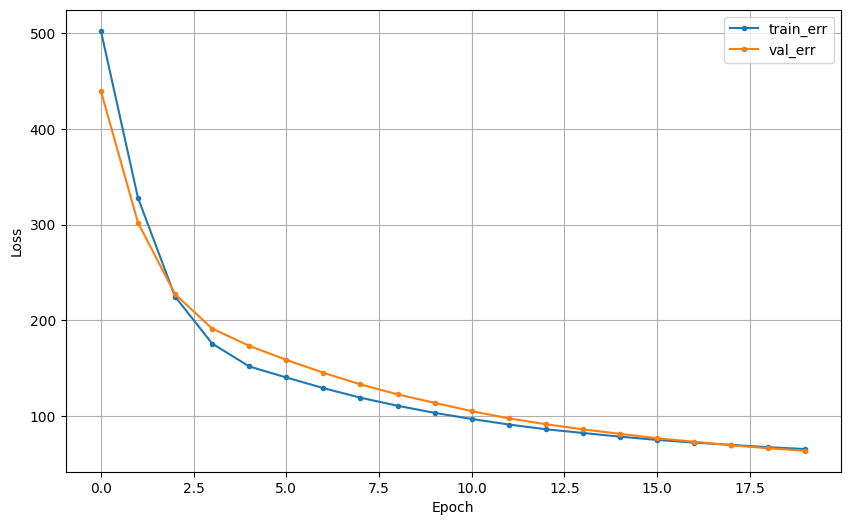

In [ ]:
dl_history_plot(history)

* 예측 및 평가

In [ ]:
pred2 = model_prac.predict(x_val)
print(f'RMSE : {root_mean_squared_error(y_val, pred2)}')
print(f'MAE  : {mean_absolute_error(y_val, pred2)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred2)}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
RMSE : 6.989531546981824
MAE  : 4.999738162171608
MAPE : 0.2547680992818976


----

## 5.딥러닝3 : hidden layer
* 이제 레이어를 추가해 보겠습니다.


### (1) 데이터 전처리

* 데이터 분할

In [ ]:
target = 'medv' # 집값
x = data.drop(target, axis = 1)
y = data.loc[:, target]

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

* 스케일링

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [ ]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

12

In [ ]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언(입력은 리스트로!)
model3 = Sequential([Input(shape = (nfeatures,)),
                     Dense(2, activation = 'relu'),
                     Dense(1)   ])

# 모델요약
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │            26 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29 (116.00 B)

 Trainable params: 29 (116.00 B)

 Non-trainable params: 0 (0.00 B)

* compile

In [ ]:
model3.compile( optimizer= Adam(learning_rate=0.1), loss = 'mse')

* 학습

In [ ]:
hist = model3.fit(x_train, y_train, epochs = 50 , validation_split= .2 ).history

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 553.1309 - val_loss: 603.4479
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 539.7327 - val_loss: 555.9055
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 496.0394 - val_loss: 510.9352
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 423.9989 - val_loss: 470.3112
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 395.2307 - val_loss: 432.7271
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 358.4543 - val_loss: 397.7359
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 370.3594 - val_loss: 365.9259
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 322.3642 - val_loss: 336.7848
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 291.5613 - val_loss: 310.3245
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 263.6011 - val_loss: 286.1463
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 254.3240 - val_loss: 264.4773
Epoch 12/50
11/11 ━━━━━━━━━━━

* 학습결과 그래프

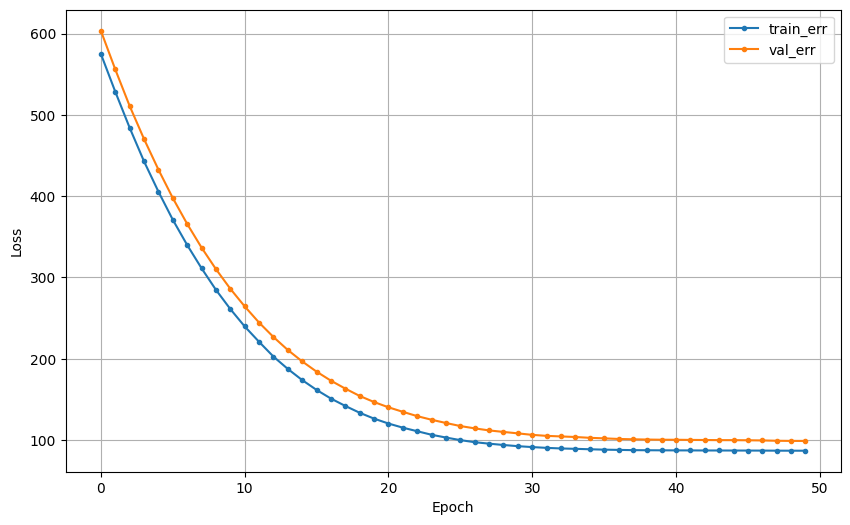

In [ ]:
dl_history_plot(hist)

* 예측 및 평가

In [ ]:
pred3 = model3.predict(x_val)
print(f'RMSE : {root_mean_squared_error(y_val, pred3)}')
print(f'MAE  : {mean_absolute_error(y_val, pred3)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred3)}')

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
RMSE : 8.06298799036907
MAE  : 5.5374953625248935
MAPE : 0.323013712446618


### (3) 실습1

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # |
| ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 104 |
| dense_1 (Dense) | (None, 1) | 9 |     

In [ ]:
model4 = Sequential([Input(shape = (nfeatures,)),
                     Dense(8, activation = 'relu'),
                     Dense(1) ])
model4.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113 (452.00 B)

 Trainable params: 113 (452.00 B)

 Non-trainable params: 0 (0.00 B)

* 컴파일 + 학습

In [ ]:
model4.compile(Adam(learning_rate = 0.1), loss='mse')

* 학습곡선

In [ ]:
hist = model4.fit(x_train, y_train, epochs = 50, validation_split= .2 ).history

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1540.9718 - val_loss: 646.7962
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 574.6606 - val_loss: 603.3840
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 514.8379 - val_loss: 561.3101
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 497.6337 - val_loss: 519.5943
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 470.7101 - val_loss: 480.6273
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 417.6900 - val_loss: 444.5400
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 368.5922 - val_loss: 410.5397
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 359.9908 - val_loss: 378.7955
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 302.3369 - val_loss: 350.2495
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 301.7189 - val_loss: 323.4428
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 265.4308 - val_loss: 298.7279
Epoch 12/50
11/11 ━━━━━━━━━━

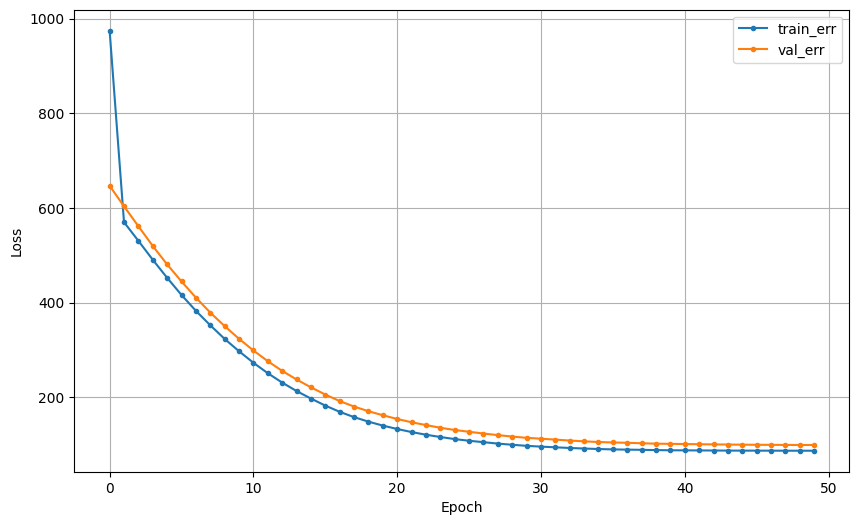

In [ ]:
dl_history_plot(hist)

* 검증

In [ ]:
pred4 = model4.predict(x_val)
print(f'RMSE : {root_mean_squared_error(y_val, pred4)}')
print(f'MAE  : {mean_absolute_error(y_val, pred4)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred4)}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
RMSE : 8.059736539098463
MAE  : 5.528046207801969
MAPE : 0.3220953918018108


### (4) 실습2

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # | 옵션 |
| ---- | ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 104 | node, input_shape, activation |
| dense_1 (Dense) | (None, 4) | 36 | node, activation |
| dense_2 (Dense) | (None, 1) | 5 | node |

In [ ]:
model5 = Sequential([Input(shape=(nfeatures,)),
                     Dense(8, activation ='relu'),
                     Dense(4, activation ='relu'),
                     Dense(1)])
model5.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 145 (580.00 B)

 Trainable params: 145 (580.00 B)

 Non-trainable params: 0 (0.00 B)

* 컴파일 + 학습

In [ ]:
model5.compile(Adam(learning_rate=0.1), loss='mse')

In [ ]:
hist = model5.fit(x_train, y_train, epochs=50, validation_split=.2).history

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 82.0854 - val_loss: 97.5483
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 88.5144 - val_loss: 99.4738
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 92.2935 - val_loss: 98.4004
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 90.3777 - val_loss: 98.5319
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 90.3368 - val_loss: 98.6715
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 88.5590 - val_loss: 98.0192
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 92.1692 - val_loss: 101.3139
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 108.5890 - val_loss: 99.7328
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 90.3839 - val_loss: 98.7170
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 85.9583 - val_loss: 99.4725
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 94.7984 - val_loss: 98.3581
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/ste

* 학습곡선

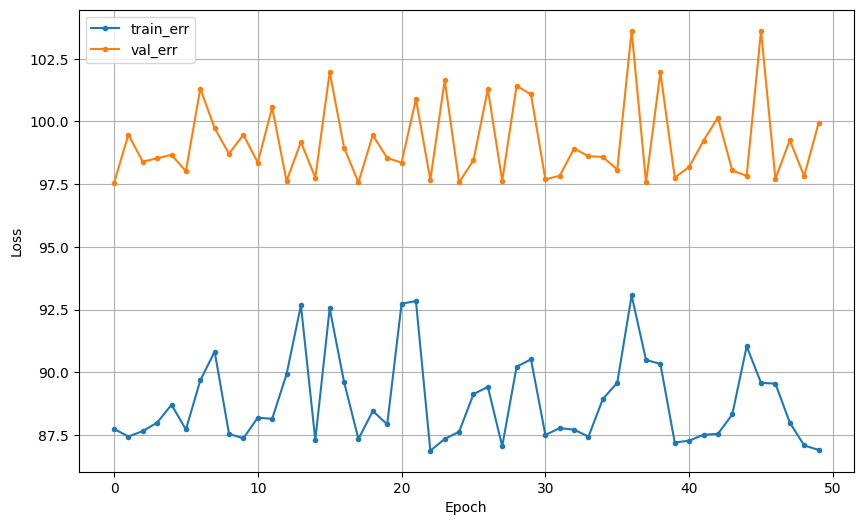

In [ ]:
dl_history_plot(hist)

* 검증

In [ ]:
pred5 = model5.predict(x_val)
print(f'RMSE : {root_mean_squared_error(y_val, pred5)}')
print(f'MAE  : {mean_absolute_error(y_val, pred5)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred5)}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
RMSE : 8.036668071252285
MAE  : 5.453125568464691
MAPE : 0.3141833848350776
